# Proyek Analisis Data: Kualitas Udara dari Aotizhongxin
- **Nama:** Fatimah Fatma Syifa
- **Email:** fatmasyifa32@gmail.com
- **ID Dicoding:** fatmasyifa

## Menentukan Pertanyaan Bisnis

- Bagaimana variasi tingkat PM2.5 sepanjang tahun?
- Bagaimana hubungan antara tingkat PM2.5 dan berbagai kondisi cuaca?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 53.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.1 MB/s eta 0:00:00


In [6]:
%%writefile app.py

Overwriting app.py


In [18]:
! wget -q -O - ipv4.icanhazip.com

34.133.18.12


In [19]:
! streamlit run app.py & npx localtunnel --port 8501

[######............] \ diffTrees: sill install generateActionsToTake


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.133.18.12:8501

npx: installed 22 in 3.633s
your url is: https://wicked-berries-post.loca.lt
2024-03-04 07:51:25.854 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 535, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 14, in <module>
    data = pd.read_csv('./data/PRSA_Data_Wanshouxigong_20130301-20170228.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, i

In [8]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from scipy.stats import f_oneway


import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [9]:
sns.set_style("whitegrid")

file_path = 'https://raw.githubusercontent.com/fatmasyifa/myproject/main/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
df = pd.read_csv(file_path)
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


### Assessing Data

In [10]:
initial_assessment = df.head()
initial_columns = df.columns
initial_datatypes = df.dtypes



initial_assessment, initial_columns, initial_datatypes

(   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
 0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
 1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
 2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
 3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
 4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   
 
      PRES  DEWP  RAIN   wd  WSPM       station  
 0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
 1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
 2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
 3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
 4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  ,
 Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
        'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
       dtype='object'),
 No           int64
 year         int64
 month    

### Cleaning Data

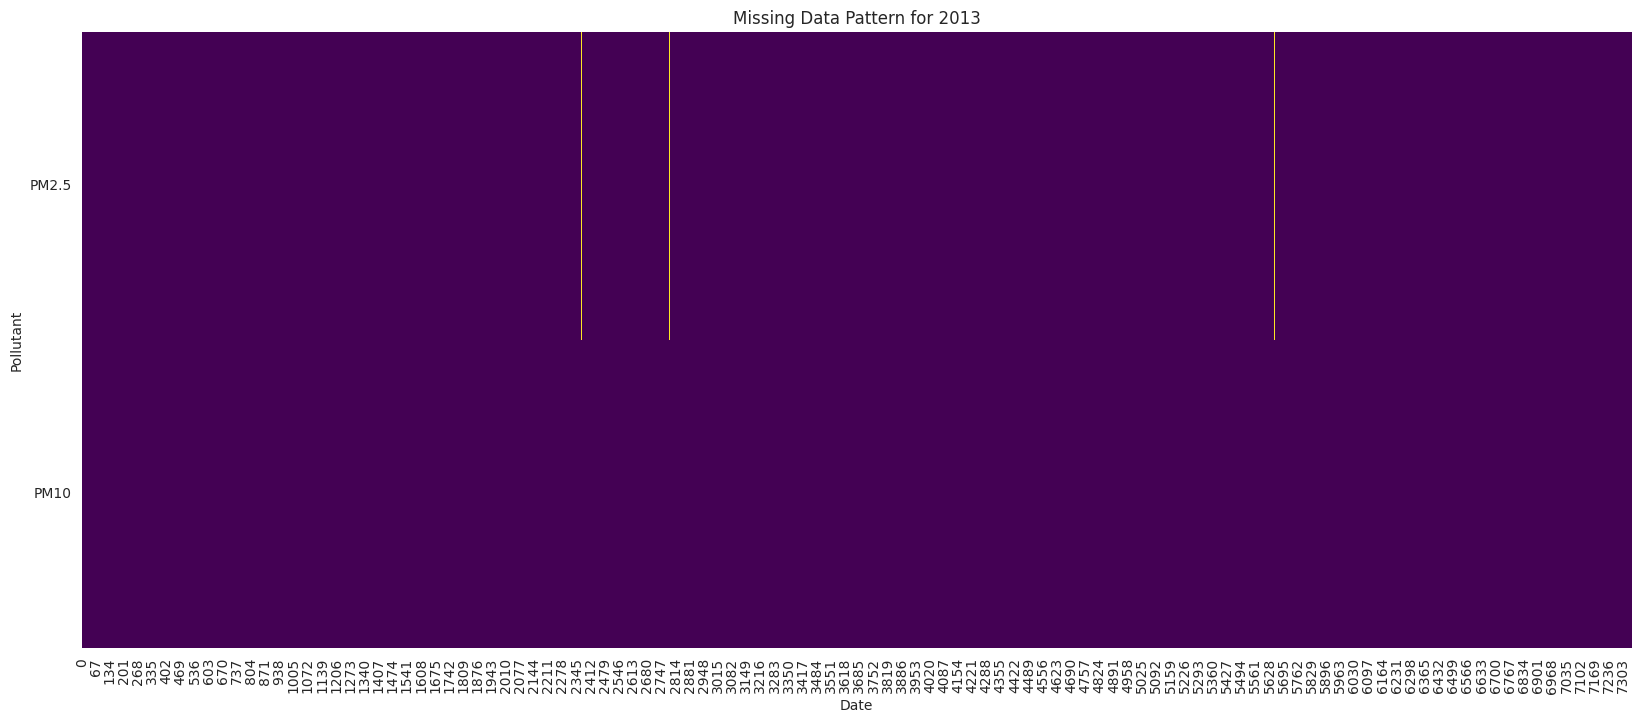

(No         0.000000
 year       0.000000
 month      0.000000
 day        0.000000
 hour       0.000000
 PM2.5      2.638033
 PM10       2.047684
 SO2        2.666553
 NO2        2.917522
 CO         5.065024
 O3         4.902464
 TEMP       0.057039
 PRES       0.057039
 DEWP       0.057039
 RAIN       0.057039
 wd         0.231006
 WSPM       0.039927
 station    0.000000
 dtype: float64,
 PM2.5          11
 PM10            5
 year     14783472
 dtype: int64)

In [11]:
missing_percentage = df.isnull().mean() * 100
cols_to_plot = ['PM2.5', 'PM10']
data_missing = df[cols_to_plot].isnull()
data_missing['year'] = df['year']
data_missing_2013 = data_missing[data_missing['year'] == 2013]
plt.figure(figsize=(20, 8))
sns.heatmap(data_missing_2013.drop('year', axis=1).T, cmap='viridis', cbar=False)
plt.title('Missing Data Pattern for 2013')
plt.xlabel('Date')
plt.ylabel('Pollutant')
plt.yticks(rotation=0)
plt.show()

missing_percentage, data_missing_2013.sum()

###Missing Data



*   Terdapat persentase data yang hilang untuk polutan relatif kecil, dengan PM2.5 yang hilang sekitar 2,63%, dan PM10 yang hilang sekitar 2,05%. Variabel polutan dan cuaca lainnya juga memiliki persentase data yang hilang dalam jumlah kecil, sehingga menunjukkan bahwa kumpulan data tersebut relatif lengkap.
*   Heatmap tahun 2013 menunjukkan bahwa data yang hilang untuk PM2.5 dan PM10 tidak mengikuti pola yang jelas, sehingga menunjukkan bahwa hilangnya data tersebut mungkin terjadi secara acak atau tidak sistematis. Tidak ada data yang hilang dalam jangka panjang, yang merupakan pertanda baik untuk analisis deret waktu.



In [12]:
data_imputed = df.fillna(method='ffill')

duplicates = data_imputed.duplicated().sum()

constant_columns = data_imputed.columns[data_imputed.nunique() <= 1]

data_types = data_imputed.dtypes

duplicates, constant_columns, data_types

(0,
 Index(['station'], dtype='object'),
 No           int64
 year         int64
 month        int64
 day          int64
 hour         int64
 PM2.5      float64
 PM10       float64
 SO2        float64
 NO2        float64
 CO         float64
 O3         float64
 TEMP       float64
 PRES       float64
 DEWP       float64
 RAIN       float64
 wd          object
 WSPM       float64
 station     object
 dtype: object)

###Summary Statistics

In [13]:
summary_statistics = data_imputed.describe()
summary_statistics

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,83.163652,110.733262,17.573220,59.290826,1267.071954,55.184512,13.581908,1011.851716,3.120283,0.067383,1.708470
std,10122.249256,1.177213,3.448752,8.800218,6.922285,82.290700,95.375762,22.819302,37.007696,1242.121599,57.582259,11.400761,10.404909,13.690615,0.909798,1.204171
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,3.000000,30.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,88.000000,9.000000,54.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,114.000000,157.000000,22.000000,81.000000,1600.000000,82.000000,23.300000,1020.100000,15.600000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000


Statistik deskriptif memperlihatkan kecondongan dan sebaran masing-masing variabel, termasuk polusi udara dan data meteorologi. Daritabel di atas, PM2.5 memiliki nilai mean mendekati 83.16 dengan standar deviasi 82.29, mengindikasi variabel signifikan pada konsentrasi polusi.

###Cleaned Data



*   'Forward fill imputation' untuk nilai yang hilang (missing values)
*   Memeriksa dan tidak ada baris yang duplikat
*   Kolom 'station' sebagai konstanta



## Exploratory Data Analysis (EDA)


*   Menganalisis 'time series trends' di PM2.5
*   Melakukan uji 'One-way ANOVA' untuk mengetahui perbedaan tingkat PM2.5 tiap tahun
*   Menyelidiki korelasi dan 'seasonal trends' dengan kondisi cuaca






## Visualization & Explanatory Analysis

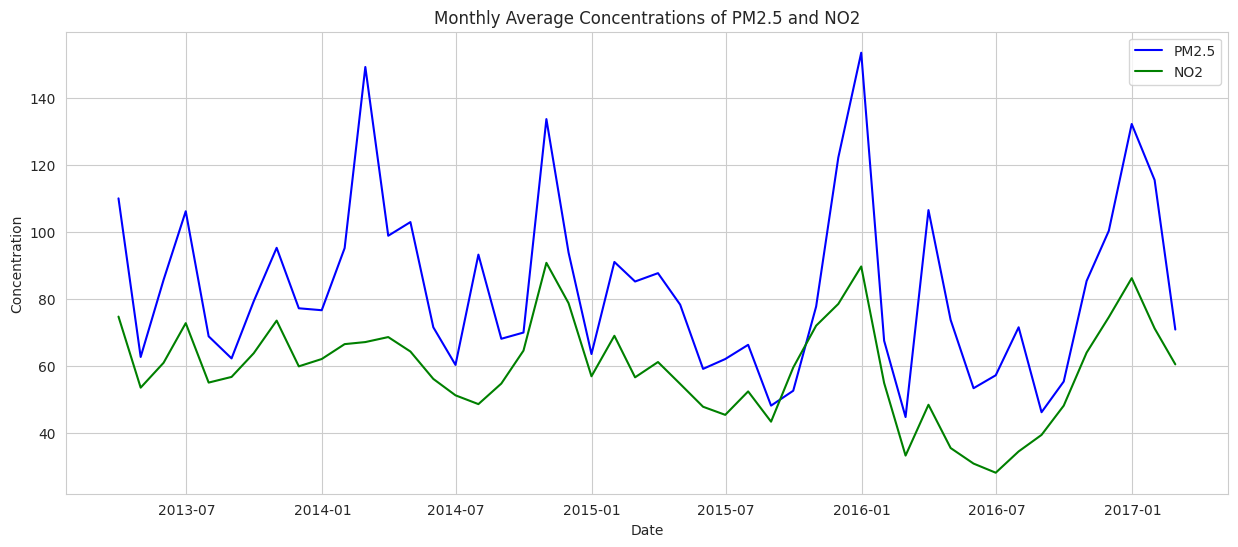

In [14]:
data_imputed['date'] = pd.to_datetime(data_imputed[['year', 'month', 'day', 'hour']])
data_time_series = data_imputed[['date', 'PM2.5', 'NO2']].set_index('date').resample('M').mean()

plt.figure(figsize=(15, 6))
plt.plot(data_time_series.index, data_time_series['PM2.5'], label='PM2.5', color='blue')
plt.plot(data_time_series.index, data_time_series['NO2'], label='NO2', color='green')
plt.title('Monthly Average Concentrations of PM2.5 and NO2')
plt.xlabel('Date')
plt.ylabel('Concentration')
plt.legend()
plt.show()

In [15]:
correlation_matrix = data_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.872035,0.474893,0.675116,0.775057,-0.159296,-0.126029,-0.003174,0.117788,-0.014301,-0.273570
PM10,0.872035,1.000000,0.470235,0.647966,0.677782,-0.146384,-0.115481,-0.028574,0.055382,-0.028175,-0.178981
SO2,0.474893,0.470235,1.000000,0.429816,0.525074,-0.211762,-0.357749,0.211480,-0.289411,-0.041699,-0.111181
NO2,0.675116,0.647966,0.429816,1.000000,0.680973,-0.497371,-0.239960,0.082465,0.065119,-0.039624,-0.485348
CO,0.775057,0.677782,0.525074,0.680973,1.000000,-0.324559,-0.371858,0.223111,-0.111219,-0.016271,-0.271217
O3,-0.159296,-0.146384,-0.211762,-0.497371,-0.324559,1.000000,0.591809,-0.424872,0.300976,0.026925,0.339195
TEMP,-0.126029,-0.115481,-0.357749,-0.239960,-0.371858,0.591809,1.000000,-0.827171,0.823224,0.036603,0.037801
PRES,-0.003174,-0.028574,0.211480,0.082465,0.223111,-0.424872,-0.827171,1.000000,-0.776459,-0.060415,0.071516
DEWP,0.117788,0.055382,-0.289411,0.065119,-0.111219,0.300976,0.823224,-0.776459,1.000000,0.080771,-0.305013
RAIN,-0.014301,-0.028175,-0.041699,-0.039624,-0.016271,0.026925,0.036603,-0.060415,0.080771,1.000000,0.022455


###Time Series Trends
Rata-rata bulanan dari PM2.5 dan NO2 dilihat dari grafik rata-rata konsentrasi bulanan dari PM2.5 dan NO2. Grafik di atas membantu untuk identifikasi 'seasonal trends' ataupun perubahan kualitas udara dari tahun ke tahun.


###Correlation Analysis
*   Hubungan dengan polusi: Matriks korelasi menunjukkan hubungan antara perbedaan polusi dengan data meteorologi. Misalnya, terdapat korelasi positif antara PM2.5 dengan NO2, hal ini berpotensi interaksi antar polusi.
*   Cuaca dan Polusi: Terdapat korelasi antara kondisi cuaca dan polusi seperti korelasi negatif antara O3 & suhu dan korelasi negatif antara O3 dan tekanan atmosfer



ANOVA Test Result: F_onewayResult(statistic=52.22432918622882, pvalue=6.21752011773655e-44)
Seasonal Trends: month
1      92.379402
2      87.206490
3     100.846169
4      79.484549
5      67.500202
6      71.513889
7      75.051411
8      56.249328
9      64.382743
10     98.084677
11     98.468611
12    106.548387
Name: PM2.5, dtype: float64
Correlations with Weather Conditions: TEMP    -0.129415
PRES    -0.005727
DEWP     0.120112
RAIN    -0.014004
PM2.5    1.000000
Name: PM2.5, dtype: float64


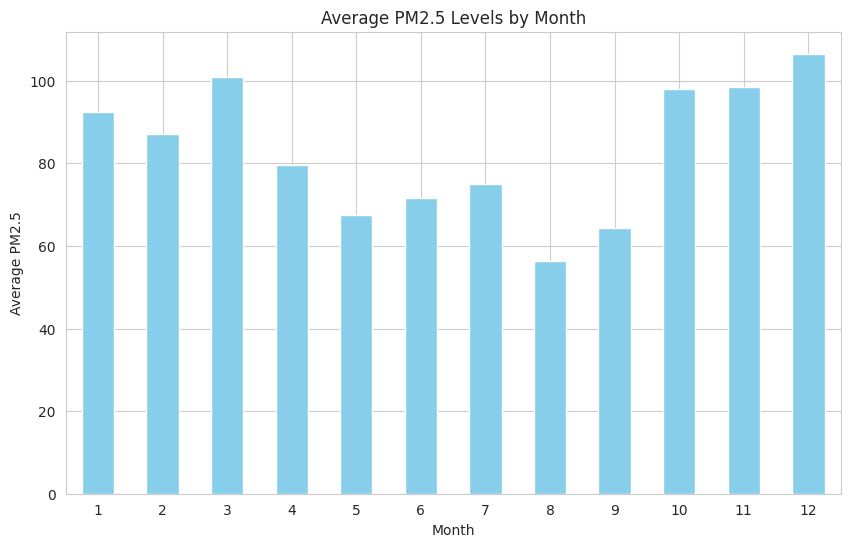

In [16]:
data_imputed.fillna(method='ffill', inplace=True)


groups = data_imputed.groupby('year')['PM2.5']

anova_test_data = [group[1] for group in groups]

anova_test_result = f_oneway(*anova_test_data)


seasonal_trends = data_imputed.groupby('month')['PM2.5'].mean()

weather_correlations = df[['TEMP', 'PRES', 'DEWP', 'RAIN', 'PM2.5']].corr()['PM2.5']


print("ANOVA Test Result:", anova_test_result)
print("Seasonal Trends:", seasonal_trends)
print("Correlations with Weather Conditions:", weather_correlations)

plt.figure(figsize=(10, 6))
seasonal_trends.plot(kind='bar', color='skyblue')
plt.title('Average PM2.5 Levels by Month')
plt.xlabel('Month')
plt.ylabel('Average PM2.5')
plt.xticks(ticks=range(0, 12), labels=[str(m) for m in range(1, 13)], rotation=0)
plt.show()

## Hypothesis Testing (ANOVA)
Hasil Uji One-way ANOVA di atas menunjukkan perbedaan yang signifikan di PM2.5 pada tahun yang berbeda (p value < 0.05). Hal ini Hal ini menunjukkan bahwa rata-rata tingkat PM2.5 tidak sama setiap tahunnya (H0 ditolak, maka H1 diterima)

### Seasonal Trends
Diagram batang menunjukkan rata-rata tingkat PM2.5 dari setiap bulan, konsentrasi tertinggi terjadi pada bulan Desember, Maret (saat musim dingin) dan konsentrasi terendah terjadi pada bulan Agustus, September (saat musim kemarau)

###Correlations with Weather Conditions
*   Korelasi negatif dengan suhu (TEMP), menunjukkan tingkat PM2.5 yang lebih tinggi saat musim dingin
*   Korelasi sedikit positif dengan titik embun (DEWP), menunjukkan tingkan PM2.5 yang lebih tinggi memungkinkan berhubungan dengan kelembapan yang lebih tinggi
*   Tidak ada korelasi yang kuat dengan tekanan atmosfer (PRES) maupun curah hujan (RAIN)



## Conclusion

### Bagaimana variasi tingkat PM2.5 sepanjang tahun?
Terdapat variasi musiman yang signifikan di tingkat PM2.5, dengan konsentrasi yang lebih tinggi di musim dingin menunjukkan terdapat kemungkinan pengaruh pemanasan dan kondisi atmosfer

### Bagaimana hubungan antara tingkat PM2.5 dan berbagai kondisi cuaca?
Hasil observasi dari korelasi negatif antara tingkat PM2.5 dan suhu menunjukkan tingkat polusi meningkat di cuaca yang dingin dan terdapat korelasi minimal dengan curah hujan dan tekanan atmosfer

In [17]:
df['hour'] = df['hour'].astype(int)
df['PM2.5'] = pd.to_numeric(df['PM2.5'], errors='coerce')